# <font color=red><strong>Obesity Risk Prediction (Multi-Class)</strong></font>

Data for this competition (both training and testing) were generated from a deep learning model trained in the risk data set or cardiovascular disease.The characteristics distributions are close, but not exactly the same, those of the original data set.I feel free to use the original data set as part of this competition, both to explore differences and to see if incorporating the original in training improves model performance.

### Facts
- 📊 The data set was generated from a deep learning model trained in the risk data set or cardiovascular disease.
- 📑 Training and testing sets are available in order to predict the Nobeyesdad class for each line in the test assembly.
- 💡 This data set is especially suitable for views, groupings and data exploration in general.
- 🔄 Distributions of characteristics in the training and test data sets are close, but not exactly the same, those of the original data set.
- 📈 The use of the original data set is encouraged to investigate differences and evaluate if incorporating it into training improves model performance.

# Introduction
<div style="font-size:120%"> 
    <b>Goal:</b> We have to predict obesity risk in individuals.<br><br>
    <b>Dataset Description:</b>
</div>

| Column | Full Form | Description| 
|---|---|---|
| 'id'| id | Unique for each person(row)|
|'Gender'| Gender| person's Gender|
| 'Age' | Age| Dtype is float. Age is between 14 years to 61 years |
|'Height'| Height | Height is in meter it's between 1.45m to 1.98m|
| 'Weight' | Weight| Weight is between 39 to 165. I think it's in KG.|
|'family_history_with_overweight'| family history <br> with overweight| yes or no question|
| 'FAVC'| Frequent consumption <br> of high calorie food| it's yes or no question. i think question they asked is <br>do you consume high calorie food|
|'FCVC'|  Frequency of <br>consumption of vegetables| Similar to FAVC. this is also `yes or no` question|
|'NCP'| Number of main meals| dtype is float, NCP is between 1 & 4. I think it should be 1,2,3,4 <br>but our data is synthetic so it's taking float values|
|'CAEC'| Consumption of <br>food between meals| takes 4 values `Sometimes`, `Frequently`, `no` & `Always` <br>|
| 'SMOKE'| Smoke | yes or no question. i think the question is "Do you smoke?" |
|'CH2O'| Consumption of <br>water daily| CH2O takes values between 1 & 3. again it's given as <br>float may be because of synthetic data. it's values should be 1,2 or 3|
|'SCC'|  Calories consumption <br>monitoring| yes or no question|
|'FAF'| Physical activity <br>frequency| FAF is between 0 to 3, 0 means no physical activity<br> and 3 means high workout. and again, in our data it's given as float|
|'TUE'| Time using <br>technology devices| TUE is between 0 to 2. I think question will be "How long you have <br>been using technology devices to track your health." in our data it's given as float |
|'CALC'| Consumption of alcohol | Takes 3 values: `Sometimes`, `no`, `Frequently`|
| 'MTRANS' | Transportation used| MTRANS takes 5 values `Public_Transportation`, `Automobile`, <br>`Walking`, `Motorbike`, & `Bike`|
|'NObeyesdad'| TARGET | This is our target, takes 7 values, and in this comp. we have to give <br>the class name (Not the Probability, which is the case in most comp.)

<br>

<div style="font-size:120%"> 
    <b>NObeyesdad (Target Variable):</b>
</div>

* Insufficient_Weight : Less than 18.5
* Normal_Weight       : 18.5 to 24.9
* Obesity_Type_I      : 30.0 to 34.9
* Obesity_Type_II     : 35.0 to 39.9
* Obesity_Type_III   : Higher than 40
* Overweight_Level_I, Overweight_Level_II takes values between 25 to 29

# <font color=Chocolate><strong>1.Import the data</strong></font>

### <strong>Check the Python language version</strong>

This Python code displays the Python language version being used in the Jupyter Notebook environment.It matters the `python_version` function of the` Platform` module and then prints the Python version.This is useful for checking the language version and ensuring that your code is compatible with this specific version.

In [1]:
from platform import python_version

print('Python language version used in this jupyter notebook:', python_version())

Python language version used in this jupyter notebook: 3.11.3


### <strong>Importing the necessary packages</strong>

In the following code, **pandas**, **numpy**, **seaborn**, **matplotlib.pyplot**, and **plotly.express** libraries are imported for data manipulation and visualization. Additionally, `%matplotlib inline` is used for displaying plots inline in Jupyter notebooks. **Warnings** module is imported to suppress any warning messages during execution. Various classifiers such as **RandomForestClassifier**, **GradientBoostingClassifier**, **AdaBoostClassifier**, **LogisticRegression**, **SVC**, **KNeighborsClassifier**, **DecisionTreeClassifier**, **ExtraTreeClassifier**, **XGBClassifier**, **LGBMClassifier**, and **CatBoostClassifier** are imported from **sklearn.ensemble**, **sklearn.linear_model**, **sklearn.svm**, **sklearn.neighbors**, and **sklearn.tree** modules for building predictive models. **LabelEncoder** from **sklearn.preprocessing** is imported for encoding categorical variables. Metrics like **roc_auc_score**, **accuracy_score**, and **classification_report** are imported from **sklearn.metrics** for model evaluation. Finally, **PrettyTable** is imported from **prettytable** for displaying tabular data neatly. This code sets up an environment for data preprocessing, model training, and evaluation, providing a comprehensive toolkit for machine learning tasks.

In [183]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from lightgbm import LGBMClassifier

### <strong>Loading the data set with `Pandas`</strong>

In the code below, **pd** is the **pandas library**. It's being used to read CSV files: 'sample_submission.csv', 'train.csv', and 'test.csv'. Data from these files is stored in **dataset_train**, and **dataset_test** respectively. This code aims to load data from CSV files into Pandas DataFrames for further analysis or processing.

In [182]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

### <strong>Viewing the data sets</strong>

No código a seguir, está sendo displayed the first five rows of the training dataset using the **dataset_train.head()** function, followed by the first five rows of the testing dataset using **dataset_test.head()**. Similarly, the last five rows of both the training and testing datasets are displayed using **dataset_train.tail()** and **dataset_test.tail()** functions, respectively. This code snippet helps to quickly inspect the beginning and end of each dataset to gain an initial understanding of its structure and contents.

In [184]:
display(dataset_train.head())

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [185]:
display(dataset_test.head())

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [186]:
display(dataset_train.tail())

id Gender        Age    Height      Weight  \
20753  20753   Male  25.137087  1.766626  114.187096   
20754  20754   Male  18.000000  1.710000   50.000000   
20755  20755   Male  20.101026  1.819557  105.580491   
20756  20756   Male  33.852953  1.700000   83.520113   
20757  20757   Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II

In [187]:
display(dataset_test.tail())

id  Gender        Age    Height      Weight  \
13835  34593    Male  23.327836  1.721384   78.030383   
13836  34594  Female  29.000000  1.590000   62.000000   
13837  34595  Female  22.935612  1.585547   44.376637   
13838  34596    Male  21.000000  1.620000   53.000000   
13839  34597    Male  26.490926  1.812259  120.980508   

      family_history_with_overweight FAVC      FCVC      NCP        CAEC  \
13835                            yes   no  2.813234  3.00000   Sometimes   
13836                             no  yes  3.000000  3.00000   Sometimes   
13837                             no  yes  3.000000  2.27374  Frequently   
13838                            yes  yes  2.000000  3.00000   Sometimes   
13839                            yes  yes  2.744994  3.00000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
13835    no  1.000000  no  0.807076  0.778632  Sometimes   
13836    no  2.000000  no  0.000000  0.000000  Sometimes   
13837    no  2.000000  no  1.949840  1.000000  Sometimes   
13838    no  2.000000  no  3.000000  2.000000         no   
13839    no  2.205977  no  1.304291  0.630866  Sometimes   

                      MTRANS  
13835  Public_Transportation  
13836  Public_Transportation  
13837  Public_Transportation  
13838  Public_Transportation  
13839  Public_Transportation

# <font color=Chocolate><strong>2. Exploratory analysis of data</strong></font>

### <strong>Displaying the data set information</strong>

In the following code, **print** statements display "DataSet Information" followed by a line of "-" characters for visual separation. The **dataset_train.info()** and **dataset_test.info()** functions provide details about the datasets **dataset_train** and **dataset_test**, respectively. These functions likely belong to a data manipulation or analysis library, such as Pandas, commonly used in Python for data handling tasks. The code aims to provide a quick overview of the structure and characteristics of the datasets, facilitating data exploration and analysis processes.

In [188]:
print("DataSet Information")
print("-" * 50)
dataset_train.info()

DataSet Information
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                  

In [189]:
print("DataSet Information")
print("-" * 50)
dataset_test.info()

DataSet Information
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                  

### <strong>Checking the dimensions of the data</strong>

No código a seguir, está sendo displayed the dimensions of the training and test dataframes using the **print** function along with string formatting. The dimensions are presented in a structured format with headers for clarity. The **dataset_train** and **dataset_test** are assumed to be pandas DataFrames, and their shape attributes are accessed using the **shape** function. Finally, the **print** function is used to output the total number of lines and columns in each dataframe.

In [190]:
print("Training Dataframe Dimensions")
print("-" * 30)
print(f"Total lines:    {dataset_train.shape[0]}")
print(f"Total columns:   {dataset_train.shape[1]}\n")

print("Test Dataframe Dimensions")
print("-" * 30)
print(f"Total lines:    {dataset_test.shape[0]}")
print(f"Total columns:   {dataset_test.shape[1]}")

Training Dataframe Dimensions
------------------------------
Total lines:    20758
Total columns:   18

Test Dataframe Dimensions
------------------------------
Total lines:    13840
Total columns:   17


# <font color=Chocolate><strong>4. Preparation of the database</strong></font>

### <strong>Removing unnecessary columns</strong>

No código a seguir, está sendo used the **pd.concat()** function from the Pandas library to concatenate the **dataset_train** DataFrame. The **drop()** function is then applied to remove the 'id' column and duplicates. Similarly, the **drop()** function is applied to the **dataset_test** DataFrame to remove the 'id' column. The resulting modified DataFrames are assigned to the variables **dataset_train** and **dataset_test**, respectively.

In [191]:
dataset_train = pd.concat([dataset_train]).drop(['id'], axis=1).drop_duplicates()
dataset_test = dataset_test.drop(['id'], axis=1)

In the following code, we're utilizing the **dataset_train** dataframe to access its column data types. Using the **value_counts()** function, we're counting the occurrences of each data type. Finally, we're displaying this count using the **display()** function. 

In [192]:
display(dataset_train.dtypes.value_counts())

object     9
float64    8
dtype: int64

### <strong>Viewing the names of the column</strong>

No código a seguir, está sendo used a print statement to display the columns of the dataset_train **DataFrame**. The **dataset_train.columns** retrieves the column names of the DataFrame, and the print function is used to output these column names to the console. This code is useful for quickly inspecting the structure of the dataset_train DataFrame by showing its column names.

In [193]:
print(dataset_train.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


### <strong>Calculating the amount of null values in each column</strong>

In the following code, the **dataset_train** is checked for missing values using the **isnull()** function, which returns a DataFrame of boolean values indicating whether each element is missing. Then, the **sum()** function is applied to this DataFrame, resulting in a count of missing values for each column.

In [194]:
dataset_train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### <strong>Checking the statistical information</strong>

In the following code, the **round** function is applied to the **describe** method of the **dataset_train** object, rounding the numerical summary statistics to three decimal places. This code is commonly used in data analysis to improve readability and presentation of statistical information, ensuring that the descriptive statistics are concise and easy to interpret.

In [195]:
round(dataset_train.describe(), 3)

Age     Height     Weight       FCVC        NCP       CH2O  \
count  20758.000  20758.000  20758.000  20758.000  20758.000  20758.000   
mean      23.842      1.700     87.888      2.446      2.761      2.029   
std        5.688      0.087     26.379      0.533      0.705      0.608   
min       14.000      1.450     39.000      1.000      1.000      1.000   
25%       20.000      1.632     66.000      2.000      3.000      1.792   
50%       22.815      1.700     84.065      2.394      3.000      2.000   
75%       26.000      1.763    111.601      3.000      3.000      2.550   
max       61.000      1.976    165.057      3.000      4.000      3.000   

             FAF        TUE  
count  20758.000  20758.000  
mean       0.982      0.617  
std        0.838      0.602  
min        0.000      0.000  
25%        0.008      0.000  
50%        1.000      0.574  
75%        1.587      1.000  
max        3.000      2.000

### <strong>Counting the amount of occurrence by category</strong>

In the following code, the **dataset_train** variable accesses a dataset, then the **Gender** column is selected using dot notation. The **value_counts()** function counts the occurrences of each unique value in the selected column, and **to_frame()** converts the result into a DataFrame, displaying the counts of each gender category in a tabular format.

In [142]:
dataset_train.Gender.value_counts().to_frame()

Gender
Female   10422
Male     10336

In the following code, the **dataset_train** variable is assumed to be a DataFrame object, likely from a Python library such as Pandas. The code snippet utilizes the Pandas library to access the **NObeyesdad** column within the dataset and then applies the **value_counts()** function to count the occurrences of each unique value in that column. Finally, the result is converted into a DataFrame using the **to_frame()** function, which returns a tabular representation of the value counts.

In [196]:
dataset_train.NObeyesdad.value_counts().to_frame()

NObeyesdad
Obesity_Type_III           4046
Obesity_Type_II            3248
Normal_Weight              3082
Obesity_Type_I             2910
Insufficient_Weight        2523
Overweight_Level_II        2522
Overweight_Level_I         2427

In the code below, the **dataset_train** is being grouped by two variables, **'NObeyesdad'** and **'Gender'**. Then, the **Age** column is counted for each combination of these variables. The result is converted into a DataFrame using the **to_frame()** function.

In [197]:
dataset_train.groupby(['NObeyesdad', 'Gender']).Age.count().to_frame()

Age
NObeyesdad          Gender      
Insufficient_Weight Female  1621
                    Male     902
Normal_Weight       Female  1660
                    Male    1422
Obesity_Type_I      Female  1267
                    Male    1643
Obesity_Type_II     Female     8
                    Male    3240
Obesity_Type_III    Female  4041
                    Male       5
Overweight_Level_I  Female  1070
                    Male    1357
Overweight_Level_II Female   755
                    Male    1767

### <strong>View the correlations between the variables in a matrix</strong>

In the following code, the **round()** function is applied to the correlation matrix of the **dataset_train** DataFrame. This function rounds the correlation values to three decimal places, providing a clearer representation of the relationships between variables in the dataset. The **corr()** function computes the pairwise correlation of columns, commonly used in data analysis to understand the linear relationship between numerical variables.

In [198]:
round(dataset_train.corr(), 3)

Age  Height  Weight   FCVC    NCP   CH2O    FAF    TUE
Age     1.000  -0.012   0.283  0.034 -0.048 -0.016 -0.192 -0.296
Height -0.012   1.000   0.417 -0.072  0.191  0.184  0.295  0.076
Weight  0.283   0.417   1.000  0.246  0.096  0.318 -0.085 -0.086
FCVC    0.034  -0.072   0.246  1.000  0.113  0.101 -0.090 -0.148
NCP    -0.048   0.191   0.096  0.113  1.000  0.081  0.101  0.067
CH2O   -0.016   0.184   0.318  0.101  0.081  1.000  0.083 -0.011
FAF    -0.192   0.295  -0.085 -0.090  0.101  0.083  1.000  0.021
TUE    -0.296   0.076  -0.086 -0.148  0.067 -0.011  0.021  1.000

# <font color=Chocolate><strong>5. Post-processed graphic visualization</strong></font>

### <strong>Viewing data distribution using `plt.subplots()`</strong>

In the following code, we are visualizing the distribution of the target variable "NObeyesdad." We first create a subplot with two axes using the `plt.subplots()` function from the **matplotlib** library, specifying a figure size of 14 by 7 inches. Then, we set the title of the entire plot to "Target Distribution" using `plt.suptitle()`. In the first axis (axs[0]), we create a histogram using **Seaborn's** `sns.histplot()` function, specifying a bin width of 0.5 for better visualization. We plot the data from the `dataset_train` DataFrame with the x-axis representing the "NObeyesdad" variable, and we color the bars based on the "Gender" column. Additionally, we rotate the x-axis labels by 60 degrees for better readability using `axs[0].tick_params()`. In the second axis (axs[1]), we create a pie chart using `plt.pie()`, where we plot the counts of unique values in the "NObeyesdad" column. We enable shadow effect and explode each slice slightly for emphasis. The labels for the slices are set to the unique values of the "NObeyesdad" column, and we display the percentage of each slice using the `autopct` parameter. Finally, we adjust the layout of the plot using `plt.tight_layout()` and display the plot using `plt.show()`.

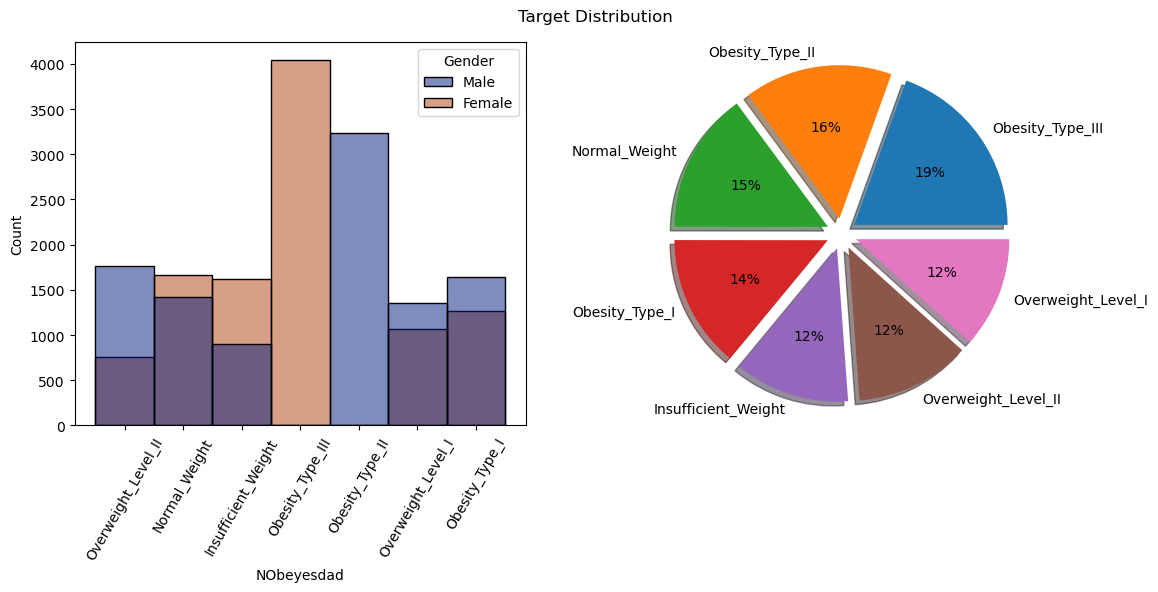

In [199]:
TARGET = "NObeyesdad"

fig, axs = plt.subplots(1, 2, figsize = (12,6))
plt.suptitle("Target Distribution")

sns.histplot(binwidth=0.5, x=TARGET, data=dataset_train, hue='Gender', palette="dark", ax=axs[0], discrete=True)
axs[0].tick_params(axis='x', rotation=60)

axs[1].pie(
        dataset_train[TARGET].value_counts(),
        shadow = True,
        explode=[.1 for i in range(dataset_train[TARGET].nunique())],
        labels = dataset_train[TARGET].value_counts().index,
        autopct='%1.f%%',
    )

plt.tight_layout()
plt.show()

### <strong>View the correlations between the variables in a `Heatmap` function chart</strong> 

In the following code, the **dataset_corr** variable stores the correlation matrix of the training dataset. Then, there's a **plot_heatmap_correlation** function defined, which takes a dataset as input and plots a heatmap of the correlation matrix using the Seaborn library. This heatmap visualizes the pairwise correlation between different variables in the dataset, with annotations displaying the correlation values. The plot is customized with a specific color map ("Purples"), annotation of values, and title formatting to emphasize the correlation chart between variables. Finally, the function is called with the training dataset as an argument to generate and display the heatmap. The resulting visualization helps in understanding the relationships and dependencies between the variables in the dataset, aiding in exploratory data analysis and feature selection.

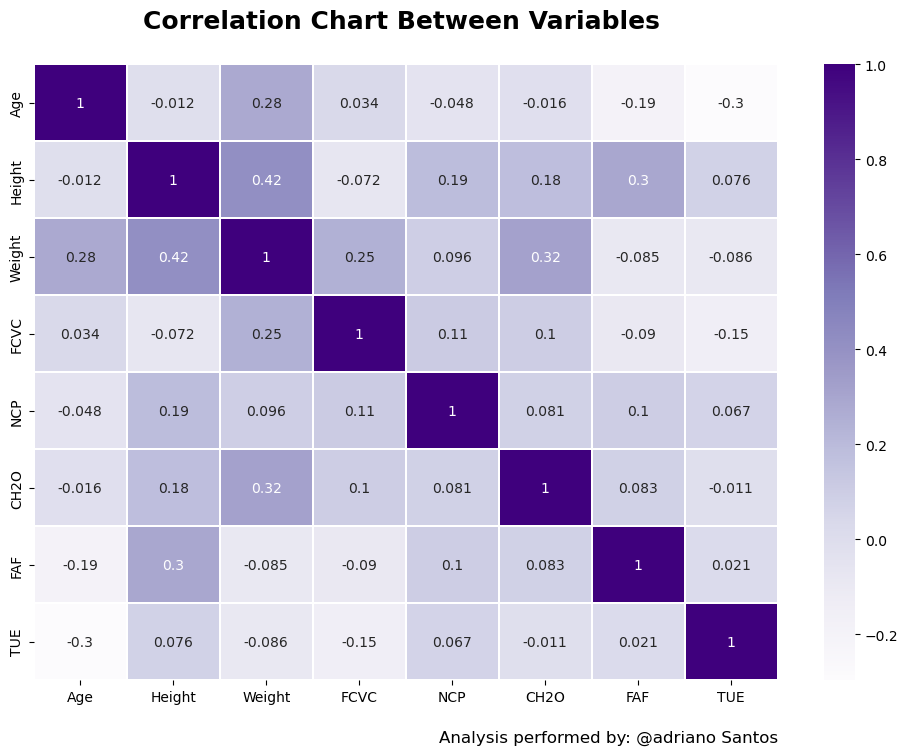

In [200]:
dataset_corr = dataset_train.corr()

def plot_heatmap_correlation(dataset):
    plt.figure(figsize=(12, 8))
    sns.heatmap(dataset.corr(), annot=True, linewidths=.2, cmap="Purples")
    plt.title('Correlation Chart Between Variables \n', weight="bold", color="#000000", fontsize=18)
    plt.annotate('Analysis performed by: @adriano Santos', xy=(1, -0.10), xycoords='axes fraction', ha='right', fontsize=12)
    
    plt.show()


plot_heatmap_correlation(dataset_train)

### <strong>Combined Numerical Plots</strong>

In the following code, a jointplot is being created using the seaborn library. This plot visualizes the relationship between two variables, "`Height`" and "`Weight`", from the dataset_train DataFrame. The **sns.jointplot()** function is utilized for this purpose, with the "`Height`" variable represented on the x-axis and the "Weight" variable on the y-axis. Additionally, the hue parameter is specified to incorporate another variable indicated by the TARGET parameter, possibly for color encoding different categories or groups within the data. The height and size parameters adjust the dimensions of the plot. Finally, **plt.show()** is used to display the plot. This code likely aims to explore the correlation or distribution between height, weight, and the target variable visually.

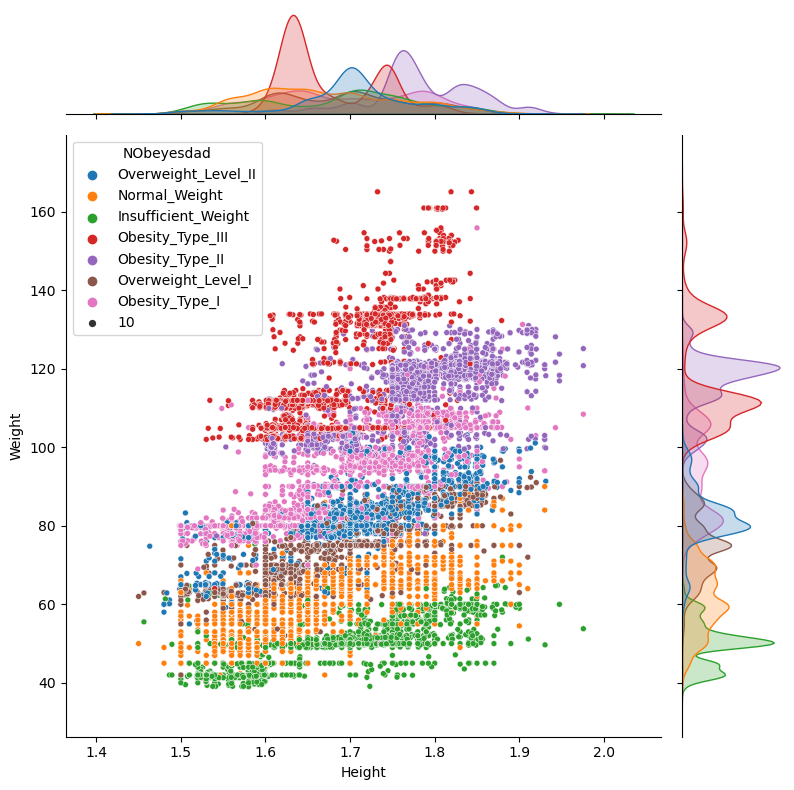

In [201]:
sns.jointplot(data=dataset_train, x="Height", y="Weight", hue=TARGET, height=8, size=10)
plt.show()

In the following code, I'm configuring the appearance of a plot using two main functions: **configure_plot()** and **plot_distribution(columnname, ax)**. The **configure_plot()** function sets the background color of the figure and axes to white and defines the size of the figure. The **plot_distribution()** function plots the distribution of a specific column from a dataset using a donut chart and a count plot side by side. It takes two arguments: the name of the column to be plotted and a Matplotlib axes object for plotting. Inside this function, I first calculate the value counts of the column, extract the index as labels, and define colors for the charts. Then, I create a donut chart using the pie() function, adjusting properties such as autopct for percentage display and text properties for font size and color. After that, I add a circle to the donut chart to make it a ring. Following the donut chart, I create a count plot using Seaborn's countplot() function, customizing it with the same color palette and label order as the donut chart. Finally, I annotate the count plot with text showing the count for each category. The **show_plot(columnname)** function is a utility function to display the configured plot for a specific column, calling the aforementioned functions and adding a title to the figure. Overall, these functions facilitate the visualization of the distribution of categorical data in a dataset.

In [30]:
def configure_plot():
  """
  Configures plot appearance elements like background color and figure size.
  """
  plt.rcParams['figure.facecolor'] = 'white'
  plt.rcParams['axes.facecolor'] = 'white'
  fig, ax = plt.subplots(1, 2, figsize=(10, 4))
  ax = ax.flatten()
  return fig, ax

def plot_distribution(columnname, ax):
  """
  Plots the distribution of a specific column using a donut chart and count plot.

  Args:
    columnname: Name of the column to be plotted.
    ax: Matplotlib axes object for plotting.
  """
  value_counts = dataset_train[columnname].value_counts()
  labels = value_counts.index.tolist()
  colors = ["#4caba4", "#d68c78", '#a3a2a2', '#ab90a0', '#e6daa3', '#6782a8', '#8ea677']

  # Donut Chart
  wedges, texts, autotexts = ax[0].pie(
      value_counts, autopct='%1.1f%%', textprops={'size': 9, 'color': 'white', 'fontweight': 'bold'}, colors=colors,
      wedgeprops=dict(width=0.35), startangle=80, pctdistance=0.85)

  # circle
  centre_circle = plt.Circle((0, 0), 0.6, fc='white')
  ax[0].add_artist(centre_circle)

  # Count Plot
  sns.countplot(data=dataset_train, y=columnname, ax=ax[1], palette=colors, order=labels)
  for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black', fontsize=10, va='center')
  sns.despine(left=True, bottom=True)
  plt.yticks(fontsize=9, color='black')
  ax[1].set_ylabel(None)
  plt.xlabel("")
  plt.xticks([])

def show_plot(columnname):
  """
  Shows a plot of the distribution for a specific column using previously defined functions.

  Args:
    columnname: Name of the column to be plotted.
  """
  fig, ax = configure_plot()
  plot_distribution(columnname, ax)
  fig.suptitle(columnname, fontsize=15, fontweight='bold')
  plt.tight_layout(rect=[0, 0, 0.85, 1])
  plt.show()

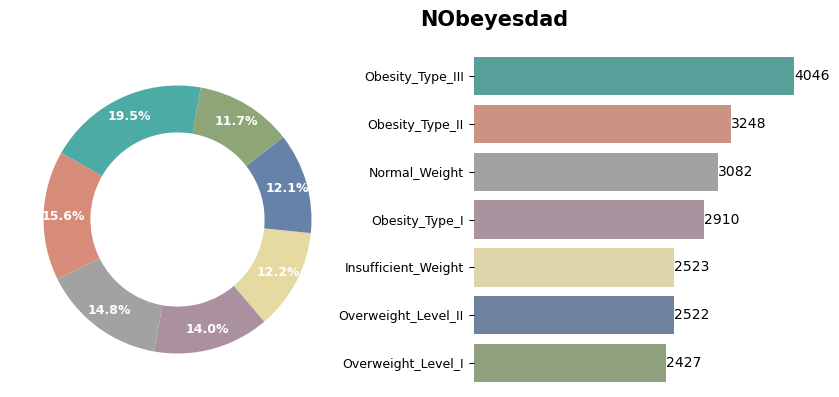

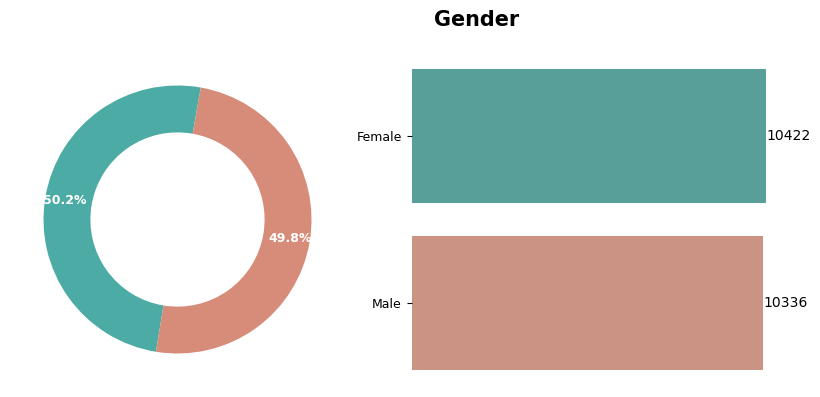

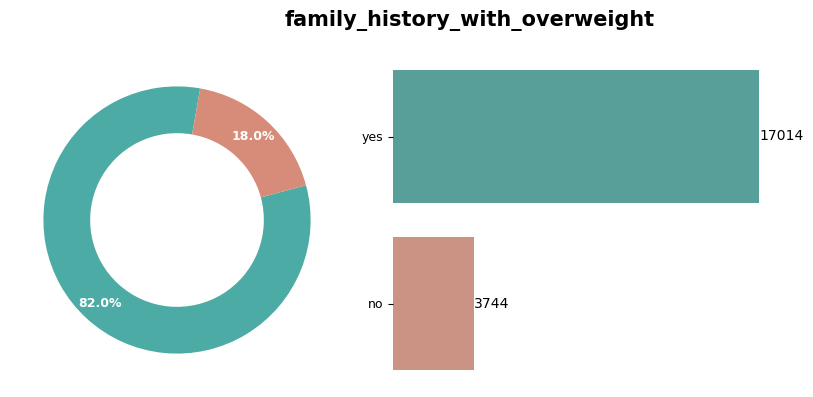

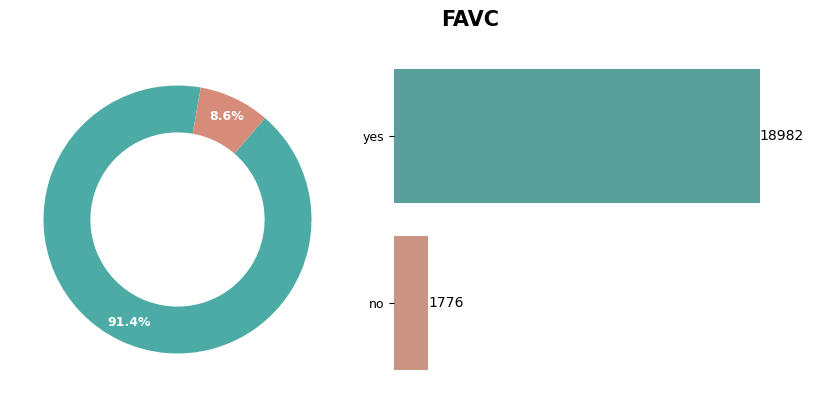

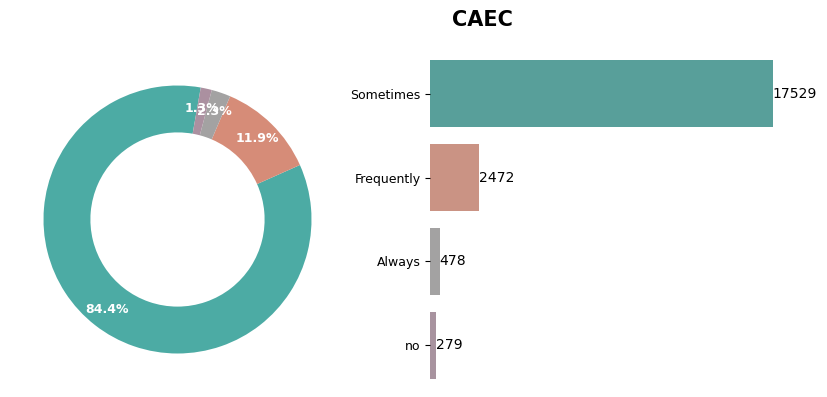

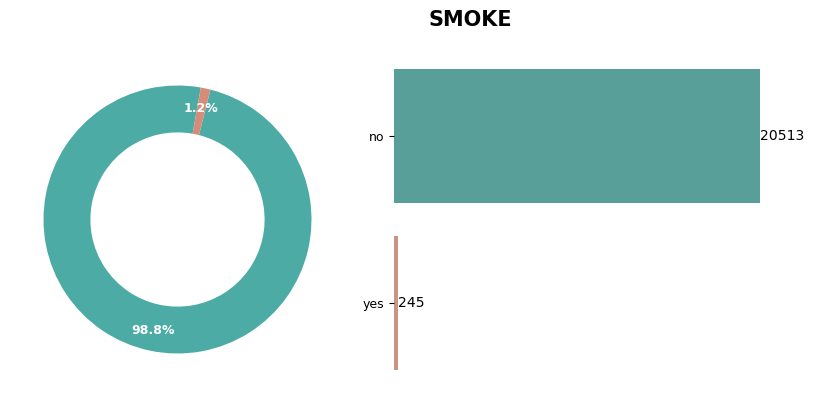

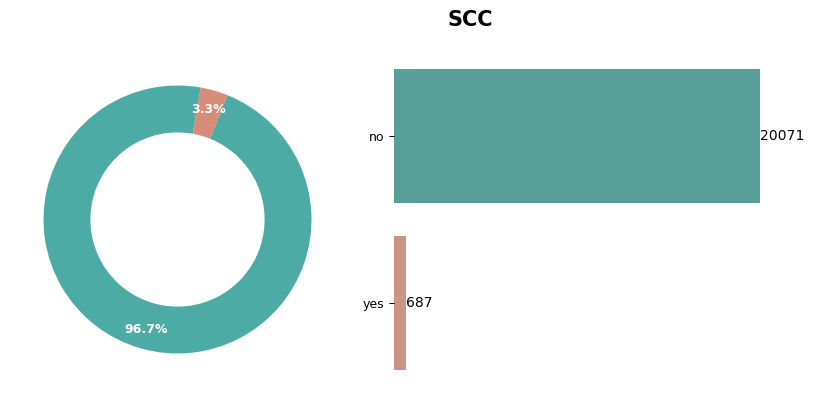

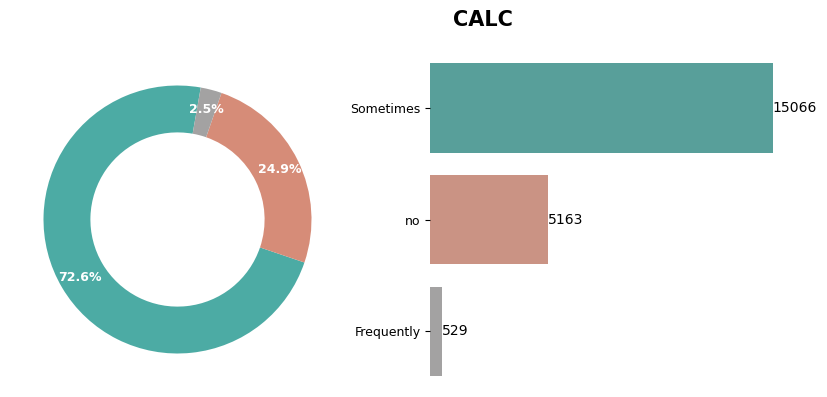

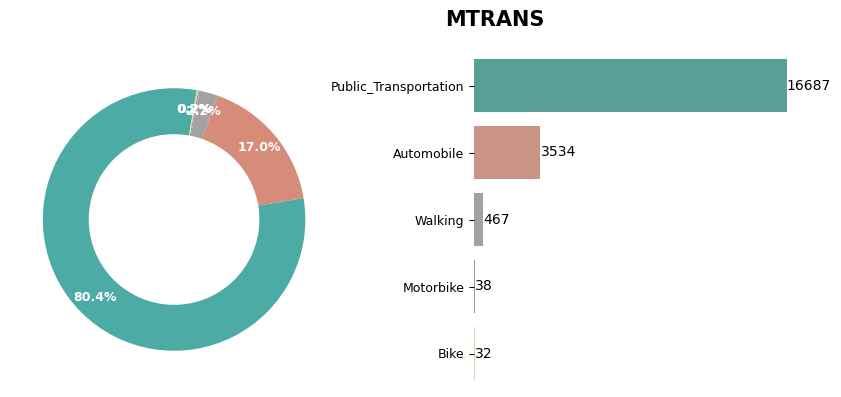

In [147]:
show_plot("NObeyesdad")
show_plot('Gender')
show_plot("family_history_with_overweight")
show_plot("FAVC")
show_plot("CAEC")
show_plot("SMOKE")
show_plot("SCC")
show_plot("CALC")
show_plot("MTRANS")

In the following code, a loop iterates over a list of column names, where each column represents a feature. Within the loop, a histogram is created for each feature using the **px.histogram()** function from the Plotly Express library. The histogram is based on data from the 'dataset_train' DataFrame, with the x-axis representing the values of the current column and the y-axis representing the 'NObeyesdad' column. The title of each histogram includes the name of the feature, and the histograms are colored by gender. Additionally, the height and width of each histogram are set to 600 and 1000 pixels, respectively. The **graphic.show()** function displays each histogram interactively. The commented line, **# graphic.write_html(f'graphic-{column}.html')**, suggests the possibility of saving each histogram as an HTML file, though it's currently disabled.

In [202]:
columns = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for column in columns:
    graphic = px.histogram(
        dataset_train, x=column, y='NObeyesdad', title=f'Gender For {column}', text_auto=True, color='Gender', height=500, width=900
    )
    # graphic.write_html(f'graphic-{column}.html')    
    graphic.show()   
    

# <font color=Chocolate><strong>6. Treatment of the database</strong></font>

### <strong>Viewing the first dataset lines</strong>

No código a seguir, está sendo utilizado o comando **display** para mostrar as primeiras linhas do conjunto de dados de treinamento, acessado através da variável **dataset_train**. This function allows inspecting the initial rows of a dataset, aiding in understanding its structure and content.

In [203]:
display(dataset_train.head())

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [204]:
display(dataset_test.head())

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  26.899886  1.848294  120.644178                            yes   
1  Female  21.000000  1.600000   66.000000                            yes   
2  Female  26.000000  1.643355  111.600553                            yes   
3    Male  20.979254  1.553127  103.669116                            yes   
4  Female  26.000000  1.627396  104.835346                            yes   

  FAVC      FCVC       NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
0  yes  2.938616  3.000000  Sometimes    no  2.825629  no  0.855400  0.000000   
1  yes  2.000000  1.000000  Sometimes    no  3.000000  no  1.000000  0.000000   
2  yes  3.000000  3.000000  Sometimes    no  2.621877  no  0.000000  0.250502   
3  yes  2.000000  2.977909  Sometimes    no  2.786417  no  0.094851  0.000000   
4  yes  3.000000  3.000000  Sometimes    no  2.653531  no  0.000000  0.741069   

        CALC                 MTRANS  
0  Sometimes  Public_Transportation  
1  Sometimes  Public_Transportation  
2  Sometimes  Public_Transportation  
3  Sometimes  Public_Transportation  
4  Sometimes  Public_Transportation

### <strong>Transforming the text columns into numbers</strong>

In the following code, a **LabelEncoder** is being utilized to encode categorical variables in both the training and testing datasets. The code iterates through each column in the training dataset and checks if the data type is "`object`" (indicating categorical data) and if the column is not named "`NObeyesdad`". If these conditions are met, the **LabelEncoder** is applied to transform the categorical values into numerical representations. Subsequently, information about the dataset is printed, providing insights into the dataset structure and data types. The same process is then repeated for the testing dataset, ensuring consistency in data preprocessing steps between the training and testing datasets. The **LabelEncoder** helps in preparing the categorical data for machine learning algorithms, as they typically require numerical inputs.

In [205]:
codificador = LabelEncoder()

for coluna in dataset_train.columns:
    # if train[coluna].dtype == "object" and coluna != "Gender" and coluna != "NObeyesdad":
    if dataset_train[coluna].dtype == "object" and coluna != "NObeyesdad":
        dataset_train[coluna] = codificador.fit_transform(dataset_train[coluna])

print("DataSet Information")
print("-" * 50)

dataset_train.info()

DataSet Information
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  int32  
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int32  
 5   FAVC                            20758 non-null  int32  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  int32  
 9   SMOKE                           20758 non-null  int32  
 10  CH2O                            20758 non-null  float64
 11  SCC                   

In [206]:
codificador = LabelEncoder()

for coluna in dataset_test.columns:
    # if train[coluna].dtype == "object" and coluna != "Gender" and coluna != "NObeyesdad":
    if dataset_test[coluna].dtype == "object" and coluna != "NObeyesdad":
        dataset_test[coluna] = codificador.fit_transform(dataset_test[coluna])

print("DataSet Information")
print("-" * 50)
dataset_test.info()

DataSet Information
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  int32  
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  int32  
 5   FAVC                            13840 non-null  int32  
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  int32  
 9   SMOKE                           13840 non-null  int32  
 10  CH2O                            13840 non-null  float64
 11  SCC                   

In the code below, the **display** function is utilized to show the first few rows of the **dataset_train** DataFrame. This function is commonly used in Python with libraries like Pandas to visually inspect data frames, aiding in initial data exploration and understanding.

In [207]:
display(dataset_train.head())

Gender        Age    Height      Weight  family_history_with_overweight  \
0       1  24.443011  1.699998   81.669950                               1   
1       0  18.000000  1.560000   57.000000                               1   
2       0  18.000000  1.711460   50.165754                               1   
3       0  20.952737  1.710730  131.274851                               1   
4       1  31.641081  1.914186   93.798055                               1   

   FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0     1  2.000000  2.983297     2      0  2.763573    0  0.000000  0.976473   
1     1  2.000000  3.000000     1      0  2.000000    0  1.000000  1.000000   
2     1  1.880534  1.411685     2      0  1.910378    0  0.866045  1.673584   
3     1  3.000000  3.000000     2      0  1.674061    0  1.467863  0.780199   
4     1  2.679664  1.971472     2      0  1.979848    0  1.967973  0.931721   

   CALC  MTRANS           NObeyesdad  
0     1       3  Overweight_Level_II  
1     2       0        Normal_Weight  
2     2       3  Insufficient_Weight  
3     1       3     Obesity_Type_III  
4     1       3  Overweight_Level_II

### <strong>Checking the statistical information</strong>

In the following code, the **round** function is applied to the **describe()** function of the **dataset_train** object, rounding the descriptive statistics to three decimal places. This code is commonly used in data analysis to present summary statistics with a specified level of precision.

In [208]:
round(dataset_train.describe(), 3)

Gender        Age     Height     Weight  \
count  20758.000  20758.000  20758.000  20758.000   
mean       0.498     23.842      1.700     87.888   
std        0.500      5.688      0.087     26.379   
min        0.000     14.000      1.450     39.000   
25%        0.000     20.000      1.632     66.000   
50%        0.000     22.815      1.700     84.065   
75%        1.000     26.000      1.763    111.601   
max        1.000     61.000      1.976    165.057   

       family_history_with_overweight       FAVC       FCVC        NCP  \
count                       20758.000  20758.000  20758.000  20758.000   
mean                            0.820      0.914      2.446      2.761   
std                             0.384      0.280      0.533      0.705   
min                             0.000      0.000      1.000      1.000   
25%                             1.000      1.000      2.000      3.000   
50%                             1.000      1.000      2.394      3.000   
75%                             1.000      1.000      3.000      3.000   
max                             1.000      1.000      3.000      4.000   

            CAEC      SMOKE       CH2O        SCC        FAF        TUE  \
count  20758.000  20758.000  20758.000  20758.000  20758.000  20758.000   
mean       1.848      0.012      2.029      0.033      0.982      0.617   
std        0.449      0.108      0.608      0.179      0.838      0.602   
min        0.000      0.000      1.000      0.000      0.000      0.000   
25%        2.000      0.000      1.792      0.000      0.008      0.000   
50%        2.000      0.000      2.000      0.000      1.000      0.574   
75%        2.000      0.000      2.550      0.000      1.587      1.000   
max        3.000      1.000      3.000      1.000      3.000      2.000   

            CALC     MTRANS  
count  20758.000  20758.000  
mean       1.223      2.507  
std        0.474      1.149  
min        0.000      0.000  
25%        1.000      3.000  
50%        1.000      3.000  
75%        1.000      3.000  
max        2.000      4.000

### <strong>View the correlations between the variables in a matrix</strong> 

In the following code, the **round** function is used to round the correlation matrix of the **dataset_train** DataFrame to three decimal places. This function calculates the correlation between all pairs of columns in the dataset and returns a new DataFrame with the rounded values.

In [209]:
round(dataset_train.corr(), 3)

Gender    Age  Height  Weight  \
Gender                           1.000  0.067   0.624   0.119   
Age                              0.067  1.000  -0.012   0.283   
Height                           0.624 -0.012   1.000   0.417   
Weight                           0.119  0.283   0.417   1.000   
family_history_with_overweight   0.096  0.262   0.228   0.514   
FAVC                             0.022  0.057   0.116   0.229   
FCVC                            -0.313  0.034  -0.072   0.246   
NCP                              0.039 -0.048   0.191   0.096   
CAEC                             0.046  0.151   0.069   0.337   
SMOKE                            0.063  0.056   0.070   0.040   
CH2O                             0.053 -0.016   0.184   0.318   
SCC                             -0.061 -0.109  -0.096  -0.185   
FAF                              0.238 -0.192   0.295  -0.085   
TUE                              0.059 -0.296   0.076  -0.086   
CALC                             0.037 -0.070  -0.089  -0.217   
MTRANS                          -0.140 -0.605  -0.050  -0.008   

                                family_history_with_overweight   FAVC   FCVC  \
Gender                                                   0.096  0.022 -0.313   
Age                                                      0.262  0.057  0.034   
Height                                                   0.228  0.116 -0.072   
Weight                                                   0.514  0.229  0.246   
family_history_with_overweight                           1.000  0.152  0.048   
FAVC                                                     0.152  1.000  0.007   
FCVC                                                     0.048  0.007  1.000   
NCP                                                      0.045  0.012  0.113   
CAEC                                                     0.204  0.116 -0.011   
SMOKE                                                    0.019 -0.016 -0.012   
CH2O                                                     0.192  0.039  0.101   
SCC                                                     -0.167 -0.112  0.022   
FAF                                                     -0.094 -0.067 -0.090   
TUE                                                      0.006  0.035 -0.148   
CALC                                                     0.002 -0.080 -0.129   
MTRANS                                                  -0.110 -0.027  0.094   

                                  NCP   CAEC  SMOKE   CH2O    SCC    FAF  \
Gender                          0.039  0.046  0.063  0.053 -0.061  0.238   
Age                            -0.048  0.151  0.056 -0.016 -0.109 -0.192   
Height                          0.191  0.069  0.070  0.184 -0.096  0.295   
Weight                          0.096  0.337  0.040  0.318 -0.185 -0.085   
family_history_with_overweight  0.045  0.204  0.019  0.192 -0.167 -0.094   
FAVC                            0.012  0.116 -0.016  0.039 -0.112 -0.067   
FCVC                            0.113 -0.011 -0.012  0.101  0.022 -0.090   
NCP                             1.000 -0.090  0.007  0.081  0.007  0.101   
CAEC                           -0.090  1.000 -0.020  0.133 -0.099 -0.092   
SMOKE                           0.007 -0.020  1.000 -0.023  0.017  0.008   
CH2O                            0.081  0.133 -0.023  1.000 -0.032  0.083   
SCC                             0.007 -0.099  0.017 -0.032  1.000  0.062   
FAF                             0.101 -0.092  0.008  0.083  0.062  1.000   
TUE                             0.067 -0.050 -0.016 -0.011 -0.008  0.021   
CALC                           -0.099 -0.067 -0.023 -0.083 -0.000  0.090   
MTRANS                         -0.002 -0.052 -0.022  0.071  0.034  0.019   

                                  TUE   CALC  MTRANS  
Gender                          0.059  0.037  -0.140  
Age                            -0.296 -0.070  -0.605  
Height                          0.076 -0.089  -0.050  
Weight                         -0.086 -0.217  -0.008

# <font color=Chocolate><strong>7. Post-processed graphic visualization</strong></font>

### <strong>Viewing the correlations between the variables in a chart of the `Heatmap` function</strong> 

In the following code, the **dataset_corr** variable stores the correlation matrix calculated from the training dataset. The **plot_heatmap_correlation** function takes a dataset as input and generates a heatmap visualization of the correlation matrix using the Seaborn library. The heatmap includes annotations of correlation values, with purple color mapping indicating the strength of correlations. Additionally, the function sets a title for the chart, specifying its weight, color, and font size. At the bottom right of the heatmap, there's an annotation mentioning the analysis was performed by @adriano Santos. Finally, the function displays the heatmap plot using Matplotlib. This code is useful for visualizing correlations between variables in a dataset, aiding in exploratory data analysis and understanding the relationships between features.

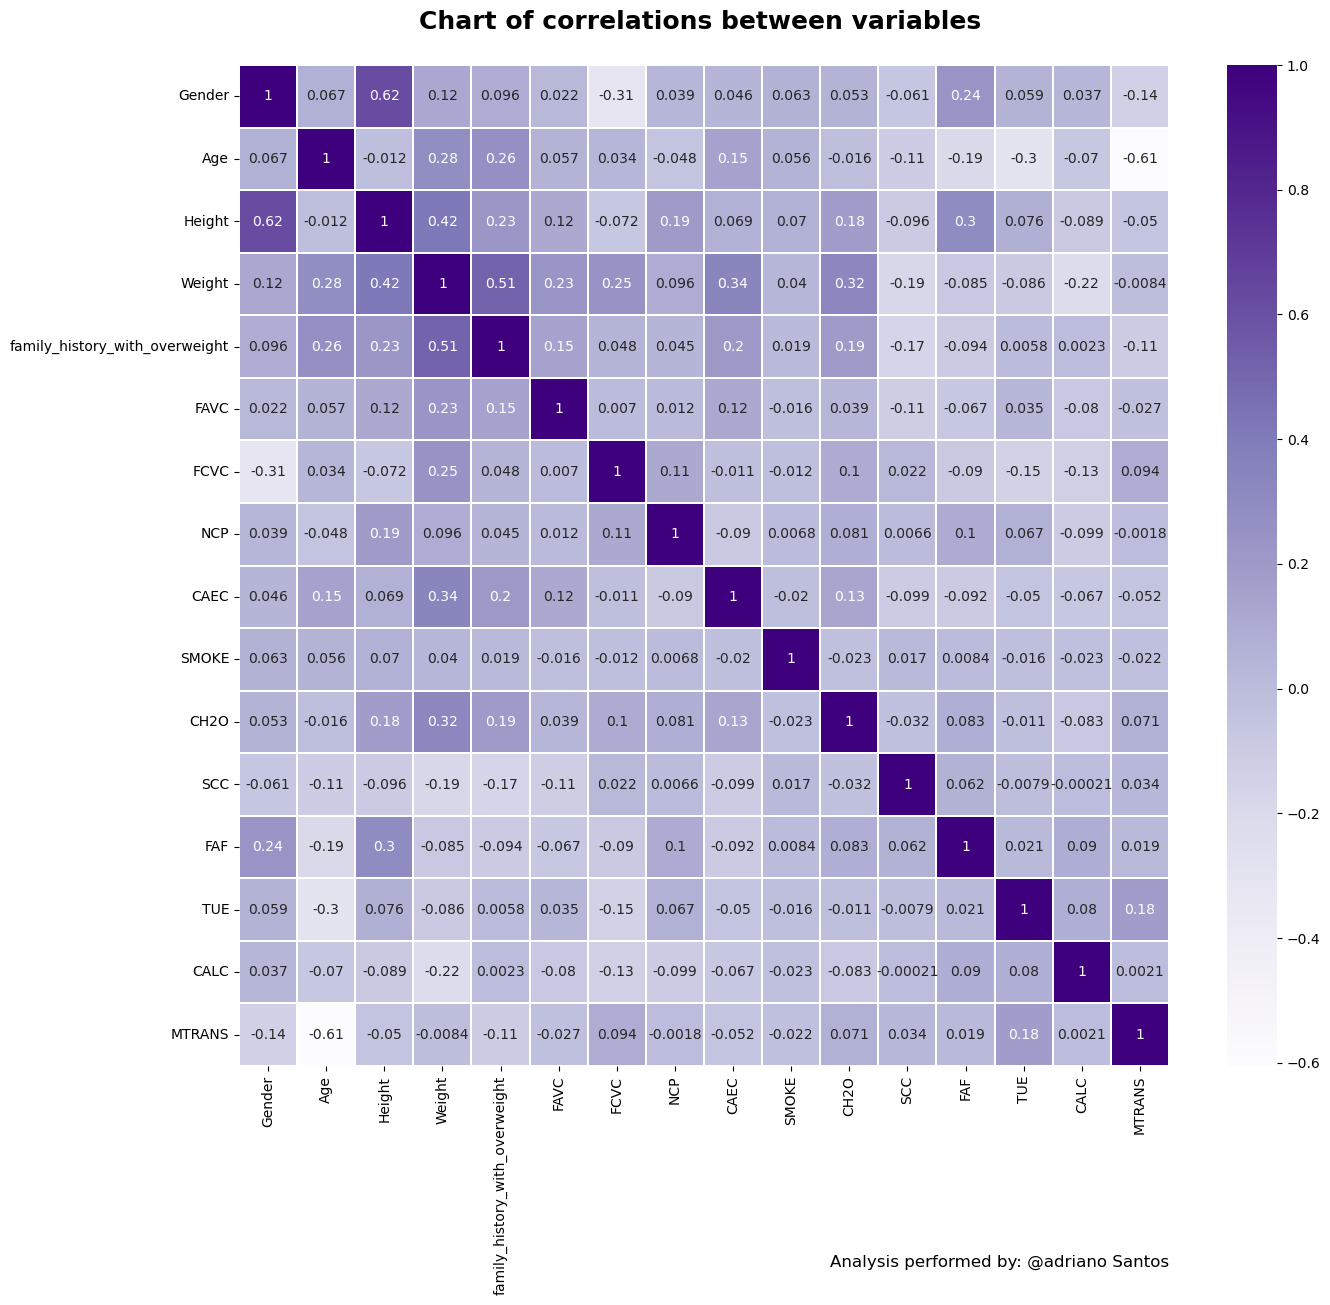

In [210]:
dataset_corr = dataset_train.corr()

def plot_heatmap_correlation(dataset):
    plt.figure(figsize=(15, 13))
    sns.heatmap(dataset.corr(), annot=True, linewidths=.2, cmap="Purples")
    plt.title('Chart of correlations between variables \n', weight="bold", color="#000000", fontsize=18)
    
    plt.annotate('Analysis performed by: @adriano Santos', xy=(1, -0.20), xycoords='axes fraction', ha='right', fontsize=12)
    
    plt.show()


plot_heatmap_correlation(dataset_train)

# <font color=Chocolate><strong>8. Construction of models</strong></font>

### <strong>Dividing the data set into the training set and the test set</strong>

In the following code, **dataset_train** is divided into features (**x**) and the target variable (**y**), where **x** contains all columns except for 'NObeyesdad', which is stored in **y**. Then, the **train_test_split** function from the **sklearn.model_selection** library is used to split **x** and **y** into training and test sets (**x_train**, **x_test**, **y_train**, **y_test**), with a test size of 20% and a random state of 42 for reproducibility. The dimensions of the training and validation sets are printed to verify the split. This code snippet is commonly used in machine learning workflows to prepare data for model training and evaluation, ensuring that the model is tested on unseen data to assess its generalization performance.

In [211]:
y = dataset_train['NObeyesdad']
x = dataset_train.drop(columns=['NObeyesdad'], axis = 1)

# test = dataset_test.drop(columns = ['id'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Set Dimensions:", x_train.shape, y_train.shape)
print("Validation set dimensions:", x_test.shape, y_test.shape)

Training Set Dimensions: (16606, 16) (16606,)
Validation set dimensions: (4152, 16) (4152,)


### <strong>Creating a function to calculate and plot a confusion matrix</strong>

In the following code, a function named **plot_confusion_matrix** is defined to visualize a confusion matrix based on the actual labels (**y_test**) and predicted labels (**predictions**). The function utilizes the **confusion_matrix** function from the scikit-learn library to compute the confusion matrix. It then creates a heatmap using seaborn's **heatmap** function, customizing it with annotations, color mapping, and a title. The annotations show the actual counts of true positives, true negatives, false positives, and false negatives. Additionally, the title defaults to "Confusion matrix" but can be customized. The analysis credit is attributed to "@Adriano Santos" at the bottom right of the plot. Finally, the plot is displayed using Matplotlib's **show** function. This function aids in assessing the performance of classification models by visually representing the distribution of predicted classes compared to actual classes.

In [212]:
def plot_confusion_matrix(y_test, predictions, title="Confusion Matrix \n"):
  
  conf_mat = confusion_matrix(y_test, predictions)

  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_mat, cbar=True, square=True, annot=True, fmt=".0f", annot_kws={"size": 12}, cmap="coolwarm")
  plt.title(title, fontsize=13)
  plt.annotate('Analysis by: @Adriano Santos', xy=(1, -0.10), xycoords='axes fraction', ha='right', fontsize=12)
  plt.tight_layout()
  
  plt.show()

In the following code, **best_params** is a dictionary containing parameters for a gradient boosting model. The **objective** specifies the model's optimization goal, while **metric** defines the evaluation metric. **Verbosity** controls the level of output (-1 for silent). **Boosting_type** determines the gradient boosting type. **Random_state** ensures reproducibility. **Num_class** indicates the number of classes. Other parameters include **learning_rate**, **n_estimators** (number of boosting iterations), **lambda_l1** and **lambda_l2** for regularization, **max_depth** for tree depth, **colsample_bytree** for feature sampling, **subsample** for sample fraction, and **min_child_samples** for minimum samples per leaf.

In [91]:
best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity Level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient reinforcement type
    "random_state": 42,                 # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the data set
    'learning_rate': 0.01197852738297134,  # Learning rate for increased gradient
    'n_estimators': 509,                # Number of increase iterations
    'lambda_l1': 0.009715116714365275,  # L1 Regularization Term
    'lambda_l2': 0.03853395161282091,   # L2 Regularization Term
    'max_depth': 11,                    # Maximum depth of the trees
    'colsample_bytree': 0.7364306508830604,  # Fraction of resources to be considered for each tree
    'subsample': 0.9529973839959326,    # Fraction of samples to be considered for each reinforcement iteration
    'min_child_samples': 17             # Minimum number of data required on a sheet
}

### <strong>Creating a model with `LGBMClassifier`</strong>

In the following code, a **LGBMClassifier** model is instantiated with the **best_params** and then trained on the **x_train** and **y_train** data using the **fit** function. This code utilizes the **LightGBM** library for gradient boosting, a powerful technique for classification tasks. The **LGBMClassifier** is a classifier provided by the library, and **fit** is a method used to train the model on the given training data, enabling it to learn patterns and relationships within the data for accurate predictions.

In [213]:
model_LGBMClassifier = LGBMClassifier(**best_params)
model_LGBMClassifier.fit(x_train, y_train)

LGBMClassifier(colsample_bytree=0.7364306508830604,
               lambda_l1=0.009715116714365275, lambda_l2=0.03853395161282091,
               learning_rate=0.01197852738297134, max_depth=11,
               metric='multi_logloss', min_child_samples=17, n_estimators=509,
               num_class=7, objective='multiclass', random_state=42,
               subsample=0.9529973839959326, verbosity=-1)

### <strong>Creating a prediction with the previously trained model</strong>

In the following code, the **predictions_1** variable stores the predictions made by the **model_LGBMClassifier** on the test data **x_test**. Then, the **classification_report** function compares these predictions with the actual labels **y_test** and prints out a detailed report including precision, recall, F1-score, and support for each class. This code snippet likely belongs to a machine learning workflow where a LightGBM classifier model is being evaluated on test data to assess its performance metrics.

In [214]:
predictions_1 = model_LGBMClassifier.predict(x_test)
print(classification_report(y_test, predictions_1))

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.93      0.94       524
      Normal_Weight       0.88      0.90      0.89       626
     Obesity_Type_I       0.89      0.88      0.88       543
    Obesity_Type_II       0.98      0.97      0.98       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.79      0.79      0.79       484
Overweight_Level_II       0.80      0.81      0.81       514

           accuracy                           0.91      4152
          macro avg       0.90      0.90      0.90      4152
       weighted avg       0.91      0.91      0.91      4152



### <strong>Analyzing the accuracy of the model</strong>

No código a seguir, está sendo calculated the accuracy score using the **accuracy_score** function from the **LGBMClassifier** model, comparing the test labels (**y_test**) with the predictions (**predictions_1**). The accuracy score is then printed out with two decimal places using the **print** function, displaying it as a percentage with the {:.2%} format specifier.

In [215]:
model_LGBMClassifier_acc = accuracy_score(y_test, predictions_1)
print("Accuracy of the model is: {:.2%}".format(model_LGBMClassifier_acc))

Accuracy of the model is: 90.82%


No código a seguir, está sendo utilized the **plot_confusion_matrix** function to visualize the confusion matrix between the true labels (**y_test**) and the predicted labels (**predictions_1**).

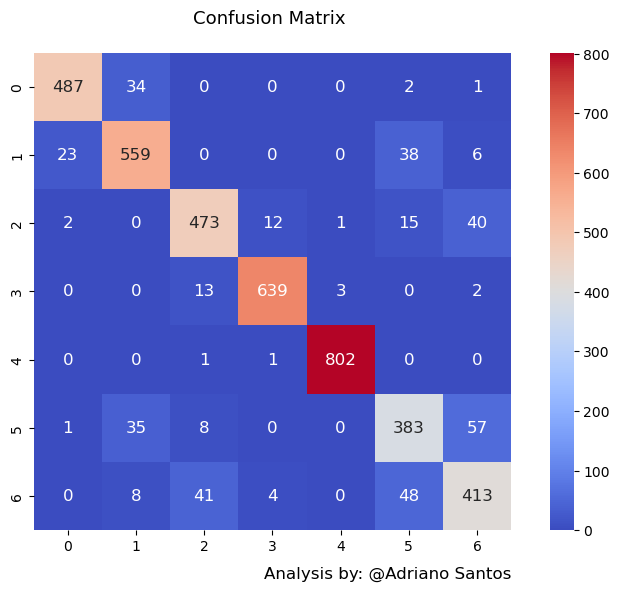

In [160]:
plot_confusion_matrix(y_test, predictions_1)

### <strong>Creating a model with `RandomForestClassifier`</strong>

No código a seguir, está sendo utilized the **RandomForestClassifier** function from the **RandomForest** library to create a random forest classifier model with 1000 estimators, utilizing all available cores for processing (-1), and setting the random state to ensure reproducibility. The model is then trained using the **fit** function on the training data (**x_train** and **y_train**).

In [216]:
model_RandomForest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
model_RandomForest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

### <strong>Creating a prediction with the previously trained model</strong>

In the code below, **predition_2** stores the predictions made by the **model_RandomForest** on the **x_test** data. Then, the **classification_report** function compares these predictions (**predition_2**) with the actual labels (**y_test**) and prints a report showing metrics like precision, recall, and F1-score for each class.

In [217]:
predition_2 = model_RandomForest.predict(x_test)
print(classification_report(y_test, predition_2))

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.92      0.93       524
      Normal_Weight       0.84      0.89      0.86       626
     Obesity_Type_I       0.89      0.86      0.88       543
    Obesity_Type_II       0.97      0.98      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.77      0.75      0.76       484
Overweight_Level_II       0.78      0.80      0.79       514

           accuracy                           0.90      4152
          macro avg       0.89      0.88      0.88      4152
       weighted avg       0.90      0.90      0.90      4152



### <strong>Analyzing the accuracy of the model</strong>

In the following code, the accuracy of a Random Forest model is evaluated using the **accuracy_score** function from the scikit-learn library. The model's accuracy is then printed as a percentage using the **format** function, with two decimal places precision.

In [221]:
model_RandomForest_acc = accuracy_score(y_test, predition_2)
print("Accuracy of the model is: {:.2%}".format(model_RandomForest_acc))

Accuracy of the model is: 89.62%


In the following code, the **plot_confusion_matrix** function is used to visualize the confusion matrix between the true labels (**y_test**) and the predicted labels (**prediction_2**).

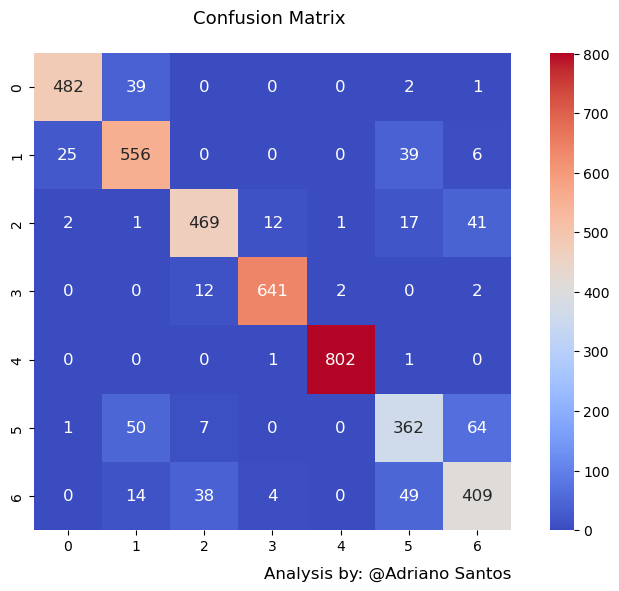

In [98]:
plot_confusion_matrix(y_test, predition_2)

### <strong>Creating a model with `LogisticRegression`</strong>

No código a seguir, está sendo utilized a **LogisticRegression** model from the scikit-learn library to perform logistic regression. The **fit** function is then employed to train the model using the training data **x_train** and corresponding labels **y_train**.

In [222]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(x_train, y_train)

LogisticRegression()

### <strong>Creating a prediction with the previously trained model</strong>

In the following code, the **LogisticRegression** model predicts values for the test data stored in **x_test**. The predicted values are then compared to the actual values in **y_test** using the **classification_report** function from the scikit-learn library. Finally, the classification report, containing precision, recall, and F1-score, is printed to evaluate the model's performance.

In [223]:
predition_3 = model_LogisticRegression.predict(x_test)
print(classification_report(y_test, predition_3))

                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.78      0.77       524
      Normal_Weight       0.61      0.62      0.62       626
     Obesity_Type_I       0.53      0.52      0.52       543
    Obesity_Type_II       0.80      0.83      0.82       657
   Obesity_Type_III       0.88      1.00      0.93       804
 Overweight_Level_I       0.48      0.46      0.47       484
Overweight_Level_II       0.45      0.34      0.39       514

           accuracy                           0.68      4152
          macro avg       0.64      0.65      0.65      4152
       weighted avg       0.67      0.68      0.67      4152



### <strong>Analyzing the accuracy of the model</strong>

In the following code, the **accuracy_score** function from the **LogisticRegression** model is used to calculate the accuracy of predictions (**predition_3**) on the test set (**y_test**). The result is then printed as a percentage with two decimal places, indicating the accuracy of the model.

In [224]:
model_LogisticRegression_acc = accuracy_score(y_test, predition_3)
print("Accuracy of the model is: {:.2%}".format(model_LogisticRegression_acc))

Accuracy of the model is: 68.04%


In the following code, the **plot_confusion_matrix** function is being called with the parameters **y_test** and **prediction_3**. 

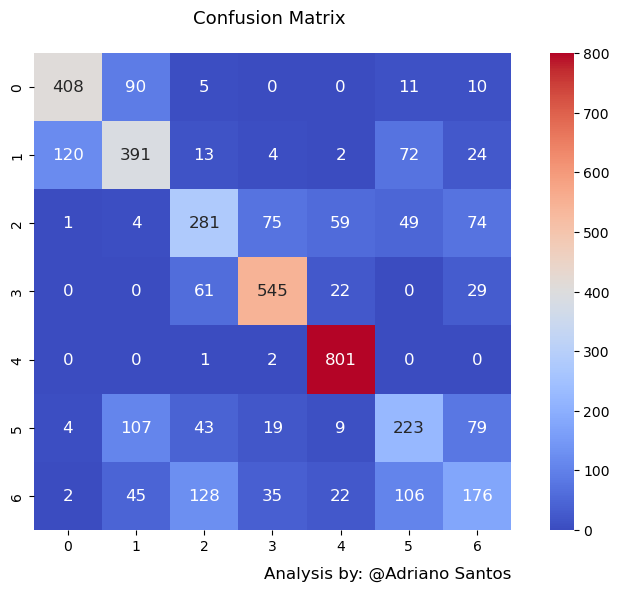

In [102]:
plot_confusion_matrix(y_test, predition_3)

### <strong>Creating a model with `SVC`</strong>

In the following code, a Support Vector Classifier (SVC) model is instantiated using a radial basis function (RBF) kernel. It then fits the model to training data (**x_train**, **y_train**) using the **fit** function. This code utilizes the **SVC** class from the **sklearn** library for machine learning tasks.

In [225]:
model_SVC = SVC(kernel="rbf")
model_SVC.fit(x_train, y_train)

SVC()

### <strong>Creating a prediction with the previously trained model</strong>

In the following code, **predictions_4** stores the predictions made by the **model_SVC** on the test data **x_test**. Then, it prints a classification report comparing the actual labels **y_test** with the predicted labels **predictions_4**.

In [226]:
predictions_4 = model_SVC.predict(x_test)
print(classification_report(y_test, predictions_4))

                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.87      0.80       524
      Normal_Weight       0.65      0.59      0.62       626
     Obesity_Type_I       0.67      0.51      0.58       543
    Obesity_Type_II       0.95      0.73      0.82       657
   Obesity_Type_III       0.83      0.99      0.91       804
 Overweight_Level_I       0.65      0.44      0.53       484
Overweight_Level_II       0.48      0.73      0.58       514

           accuracy                           0.71      4152
          macro avg       0.71      0.69      0.69      4152
       weighted avg       0.73      0.71      0.71      4152



### <strong>Analyzing the accuracy of the model</strong>

In the following code, the **accuracy_score** function from the **scikit-learn** library computes the accuracy of a support vector classifier model (**model_svc_acc**) on test data (**y_test**) compared to predictions (**predictions_4**). The result is printed as a percentage with two decimal places, indicating the accuracy of the model.

In [227]:
model_svc_acc = accuracy_score(y_test, predictions_4)
print("Accuracy of the model is: {:.2%}".format(model_svc_acc))

Accuracy of the model is: 71.39%


In the following code, the **plot_confusion_matrix** function is used to visualize the confusion matrix between the true labels (**y_test**) and the predicted labels (**predictions_4**).

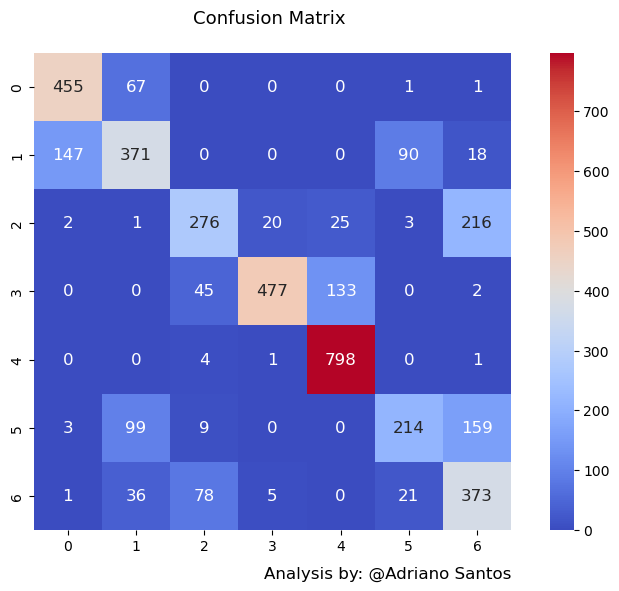

In [59]:
plot_confusion_matrix(y_test, predictions_4)

### <strong>Creating a model with `GradientBoostingClassifier`</strong>

In the following code, a **GradientBoostingClassifier** model is instantiated and trained using the **fit** function with training data **x_train** and corresponding labels **y_train**. This code likely belongs to a machine learning pipeline, specifically employing gradient boosting for classification tasks.

In [228]:
model_BoostingClassifier = GradientBoostingClassifier()
model_BoostingClassifier.fit(x_train, y_train)

GradientBoostingClassifier()

### <strong>Creating a prediction with the previously trained model</strong>

In the following code, the **predictions_5** variable stores the predictions made by the **model_BoostingClassifier** on the test data **x_test**. Then, the **classification_report** function compares the actual test labels **y_test** with the predicted labels and prints a report showing precision, recall, and F1-score for each class.

In [229]:
predictions_5 = model_BoostingClassifier.predict(x_test)
print(classification_report(y_test, predictions_5))

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.94      0.94       524
      Normal_Weight       0.88      0.88      0.88       626
     Obesity_Type_I       0.88      0.87      0.88       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.78      0.78      0.78       484
Overweight_Level_II       0.80      0.80      0.80       514

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



### <strong>Analyzing the accuracy of the model</strong>

In the following code, the accuracy score of a **BoostingClassifier** model is computed using the **accuracy_score** function from the scikit-learn library, comparing the true labels (**y_test**) with the predicted labels (**predictions_5**). The result is then printed out, displaying the accuracy of the model rounded to two decimal places.

In [231]:
model_BoostingClassifier_acc = accuracy_score(y_test, predictions_5)
print("Accuracy of the model is: {:.2%}".format(model_BoostingClassifier_acc))

Accuracy of the model is: 90.27%


In the following code, the **plot_confusion_matrix** function is used to visualize the confusion matrix between the true labels (**y_test**) and the predicted labels (**predictions_5**).

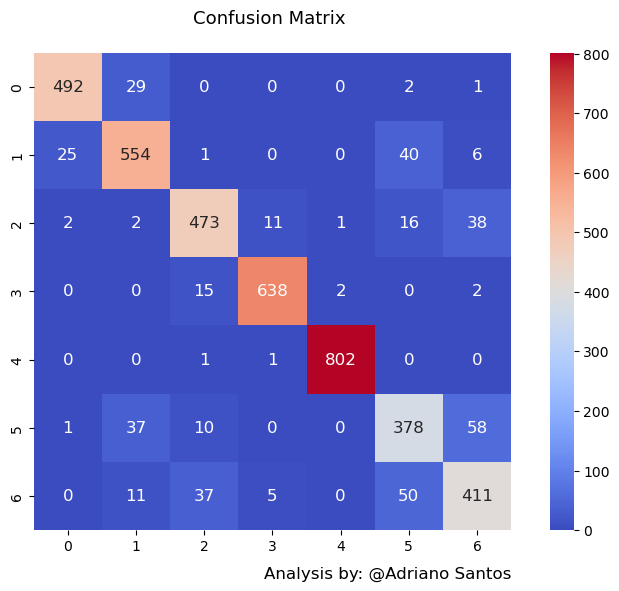

In [63]:
plot_confusion_matrix(y_test, predictions_5)

### <strong>Viewing performance graph of different models</strong>

In the following code, a **matplotlib** figure with a size of 12 by 6 inches is created using the **plt.figure(figsize=(12,6))** function. Two lists are defined: **model_acc** containing the accuracy scores of different machine learning models, and **model_name** containing the names of these models as strings. These lists correspond to the accuracy scores and names of models such as LGBMClassifier, RandomForest, LogisticRegression, SVC, and BoostingClassifier. Subsequently, a horizontal bar plot is generated using **sns.barplot(x=model_acc, y=model_name, palette='magma')** from the **seaborn** library, where the accuracy scores are plotted on the x-axis against the model names on the y-axis. The plot is customized with a title using **plt.title()** and an annotation indicating the analysis author using **plt.annotate()**. Finally, the plot is displayed using **plt.show()**. This code visualizes the performance of various machine learning models based on their accuracy scores, facilitating comparison and analysis.

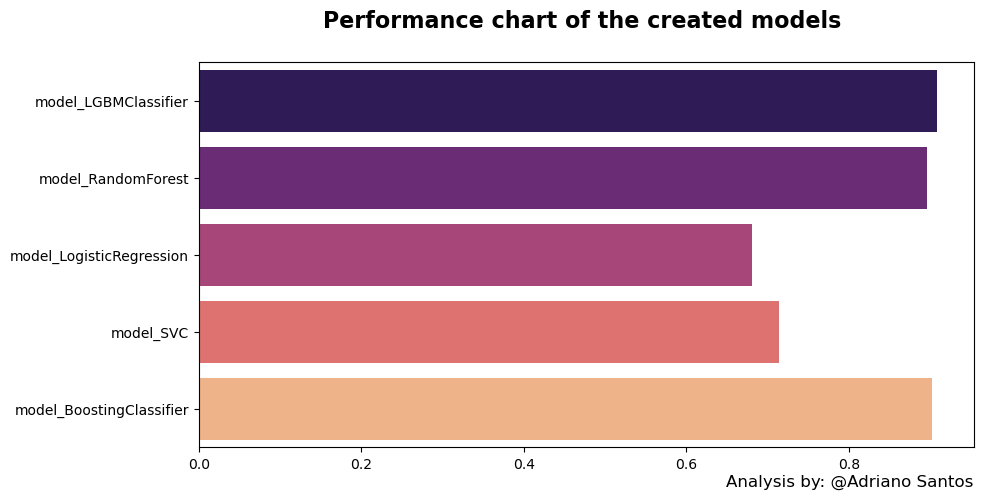

In [232]:
plt.figure(figsize=(10,5))

model_acc = [
    model_LGBMClassifier_acc, 
    model_RandomForest_acc, 
    model_LogisticRegression_acc, 
    model_svc_acc, 
    model_BoostingClassifier_acc,   
]

model_name = [
    'model_LGBMClassifier', 
    'model_RandomForest', 
    'model_LogisticRegression', 
    'model_SVC', 'model_BoostingClassifier',    
]

sns.barplot(x= model_acc, y=model_name, palette='magma')
plt.title("Performance chart of the created models \n", fontweight = "bold", fontsize=16)
plt.annotate('Analysis by: @Adriano Santos', xy=(1, -0.10), xycoords='axes fraction', ha='right', fontsize=12)

plt.show()

### <strong>Prediction on test data and final submission</strong>

In the following code, the **pandas** library is being utilized. First, it reads a CSV file named "sample_submission.csv" and stores its contents into a variable named **submission**. Then, using the **iloc** function, it assigns values to specific rows and columns of the **submission** DataFrame. Here, it assumes that the column labeled "NObeyesdad" is located at index 1. After updating the DataFrame with the predictions stored in **predictions_1**, the modified DataFrame is saved back to a CSV file named "submission.csv" using the **to_csv** function, with the parameter **index=False** to exclude row indices from the output file. Optionally, the code displays the first few rows of the modified DataFrame using the **head** function to verify the changes made.

In [233]:
submission = pd.read_csv("sample_submission.csv")
submission.iloc[range(len(predictions_1)), 1] = predictions_1

submission.to_csv("submission.csv", index=False)
submission.head()

id          NObeyesdad
0  20758    Obesity_Type_III
1  20759  Overweight_Level_I
2  20760      Obesity_Type_I
3  20761     Obesity_Type_II
4  20762       Normal_Weight